<a href="https://colab.research.google.com/github/abdullahkrs/e-Portfolio-Machine-Learning-January-2025/blob/main/Unit04_Correlation_Regression_Global_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🌍 Unit 4 Seminar: Linear Regression with Scikit-Learn

This notebook addresses **Task A** and **Task B** from the Unit 4 seminar exercise using the `Global_Population.csv` and `Global_GDP.csv` datasets.

We examine the relationship between the average population of each country and its mean per capita GDP for the period 2001–2020.

---

## 📌 Tasks Overview
**Task A: Correlation**
- Calculate mean population and mean per capita GDP (2001–2020)
- Visualize and interpret correlation
- Evaluate the Pearson Correlation Coefficient

**Task B: Linear Regression**
- Perform linear regression where:
  - Independent variable: Mean Population
  - Dependent variable: Mean Per Capita GDP
- Plot regression line and interpret model fit


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from google.colab import files
import io

# Upload files
uploaded = files.upload()

# Read uploaded CSV files
pop_df = pd.read_csv(io.BytesIO(uploaded['Unit04 Global_Population.csv']))
gdp_df = pd.read_csv(io.BytesIO(uploaded['Unit04 Global_GDP.csv']))

# Use valid years (2001–2020)
years = [str(y) for y in range(2001, 2021)]
pop_df[years] = pop_df[years].apply(pd.to_numeric, errors='coerce')
gdp_df[years] = gdp_df[years].apply(pd.to_numeric, errors='coerce')

# Filter and compute means
pop_filtered = pop_df[pop_df["Series Name"] == "Population, total"].copy()
gdp_filtered = gdp_df[gdp_df["Indicator Name"] == "GDP (current US$)"].copy()

pop_filtered["Mean Population"] = pop_filtered[years].mean(axis=1)
gdp_filtered["Mean GDP"] = gdp_filtered[years].mean(axis=1)

# Merge and compute per capita GDP
merged_df = pd.merge(
    pop_filtered[["Country Name", "Mean Population"]],
    gdp_filtered[["Country Name", "Mean GDP"]],
    on="Country Name"
)
merged_df["Mean Per Capita GDP"] = merged_df["Mean GDP"] / merged_df["Mean Population"]
merged_df.dropna(subset=["Mean Population", "Mean Per Capita GDP"], inplace=True)


Saving Unit04 Global_Population.csv to Unit04 Global_Population.csv
Saving Unit04 Global_GDP.csv to Unit04 Global_GDP.csv



## 🧪 Task A: Correlation

We analyze the relationship between the **mean population** and **mean per capita GDP** for each country between 2001–2020.


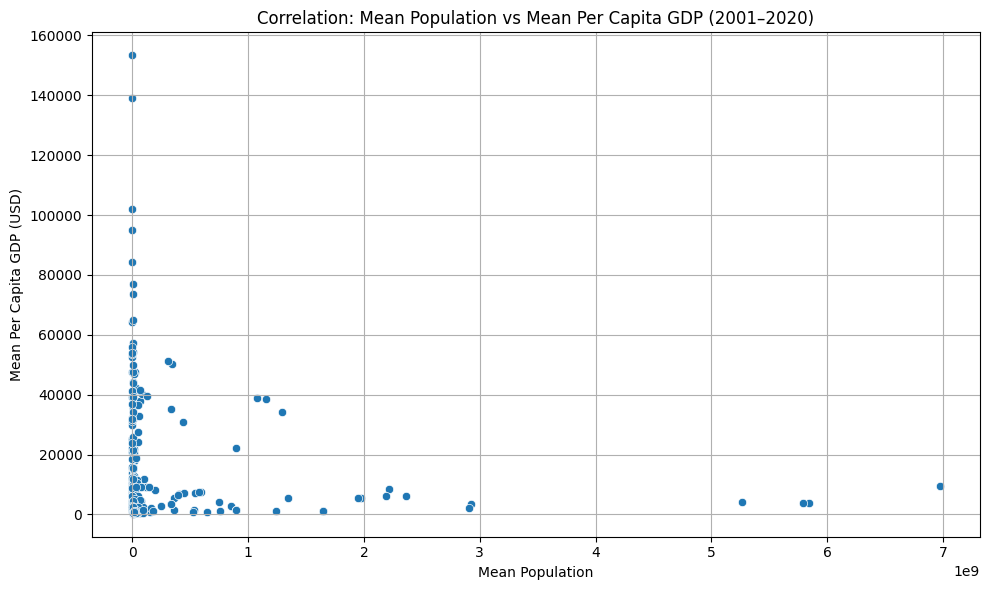

Pearson Correlation Coefficient: -0.0996


In [5]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Mean Population", y="Mean Per Capita GDP", data=merged_df)
plt.title("Correlation: Mean Population vs Mean Per Capita GDP (2001–2020)")
plt.xlabel("Mean Population")
plt.ylabel("Mean Per Capita GDP (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr, _ = pearsonr(merged_df["Mean Population"], merged_df["Mean Per Capita GDP"])
print(f"Pearson Correlation Coefficient: {corr:.4f}")



## 📈 Task B: Linear Regression

We apply linear regression with:
- **X (independent)**: Mean Population
- **y (dependent)**: Mean Per Capita GDP


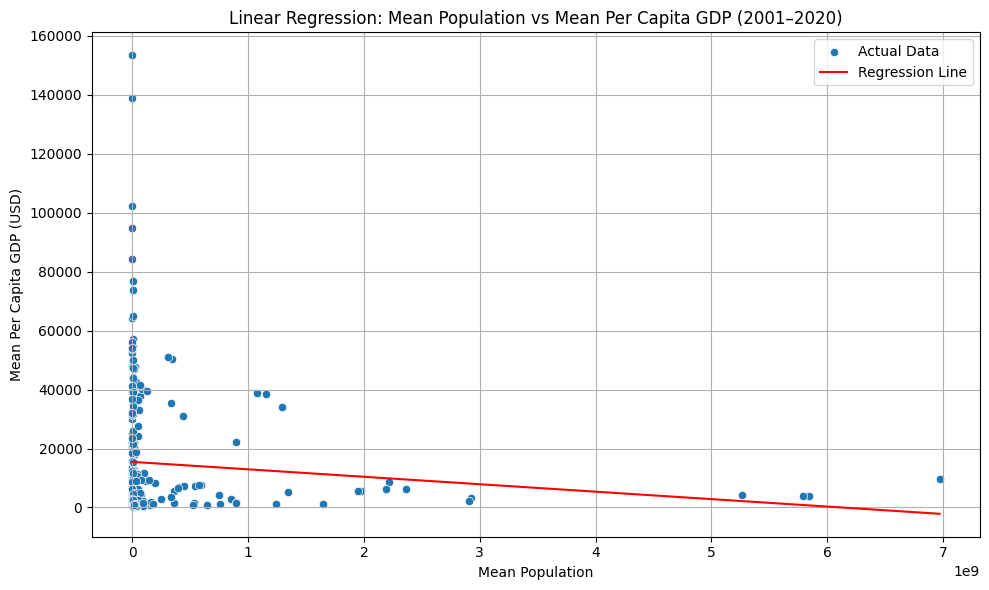

Slope: -0.000003
Intercept: 15463.86
R² Score: 0.0099


In [6]:

# Prepare regression
X = merged_df[["Mean Population"]].values
y = merged_df["Mean Per Capita GDP"].values

reg = LinearRegression()
reg.fit(X, y)

# Output regression stats
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

# Predict line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = reg.predict(x_line)

# Plot regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df["Mean Population"], y=merged_df["Mean Per Capita GDP"], label="Actual Data")
plt.plot(x_line, y_line, color="red", label="Regression Line")
plt.title("Linear Regression: Mean Population vs Mean Per Capita GDP (2001–2020)")
plt.xlabel("Mean Population")
plt.ylabel("Mean Per Capita GDP (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.2f}")
print(f"R² Score: {r2:.4f}")



## 🧾 Conclusion

- The correlation coefficient is close to 0, suggesting a **very weak negative correlation**.
- The linear regression confirms the lack of strong relationship, with an **R² value < 1%**.
- Population alone is not a reliable predictor of per capita GDP — other socio-economic factors likely contribute significantly.

---
